In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
def f1(x):
    return 1 / (1 + 25 * x**2)

def lagrange_interpolation(f, x, x_interp):
    n = len(x)
    P = np.zeros_like(x_interp)
    for j in range(n):
        L = np.ones_like(x_interp)
        for i in range(n):
            if i != j:
                L *= (x_interp - x[i]) / (x[j] - x[i])
        P += f(x[j]) * L
    return P
    
def chebyshev_nodes(n, a, b):
    j = np.arange(n + 1)
    nodes = np.cos((2*j + 1) * np.pi / (2 * (n + 1)))
    return a + 0.5 * (b - a) * (1 + nodes)

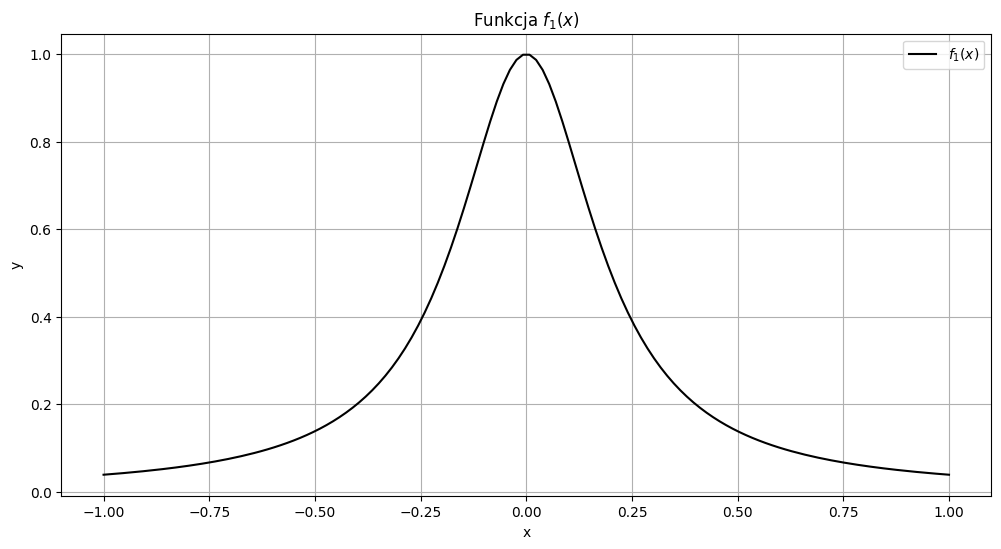

In [3]:
n = 12
x_uniform = np.linspace(-1, 1, n + 1)
x_dense_uniform = np.linspace(-1, 1, 10*(n + 1))

plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, f1(x_dense_uniform), 'k', label='$f_1(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcja $f_1(x)$')
plt.legend()
plt.grid(True)
plt.show()

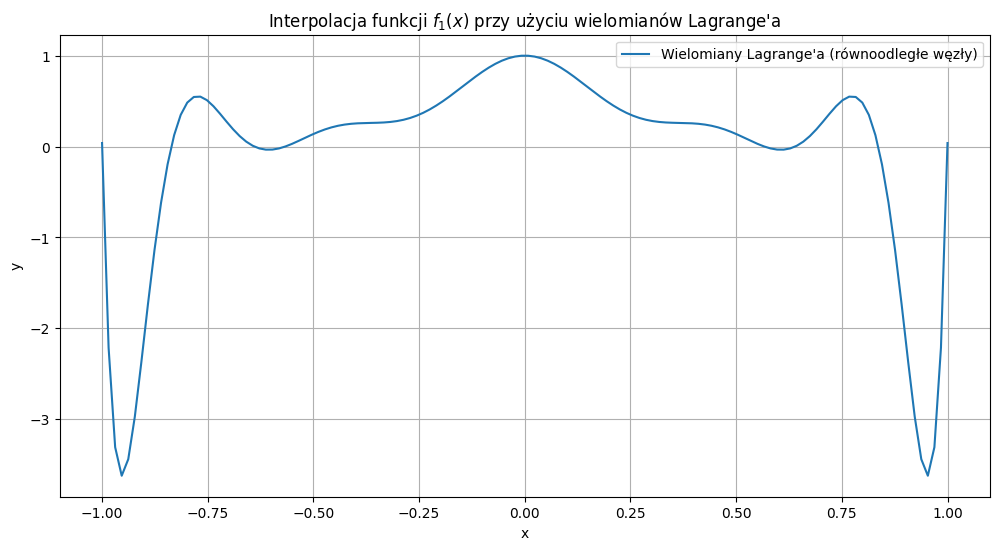

In [4]:
P_uniform = lagrange_interpolation(f1, x_uniform, x_dense_uniform)

plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, P_uniform, label='Wielomiany Lagrange\'a (równoodległe węzły)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$ przy użyciu wielomianów Lagrange\'a')
plt.legend()
plt.grid(True)
plt.show()

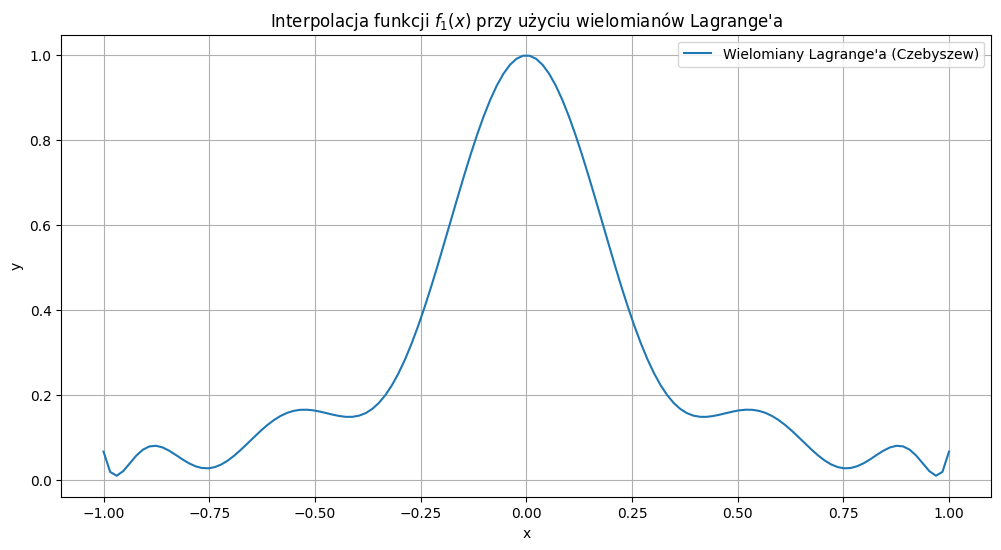

In [5]:
x_chebyshev = chebyshev_nodes(n, -1, 1)
x_dense_chebyshev = np.linspace(-1, 1, 10*(n + 1))
P_chebyshev = lagrange_interpolation(f1, x_chebyshev, x_dense_chebyshev)

plt.figure(figsize=(12, 6))
plt.plot(x_dense_chebyshev, P_chebyshev, label='Wielomiany Lagrange\'a (Czebyszew)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$ przy użyciu wielomianów Lagrange\'a')
plt.legend()
plt.grid(True)
plt.show()

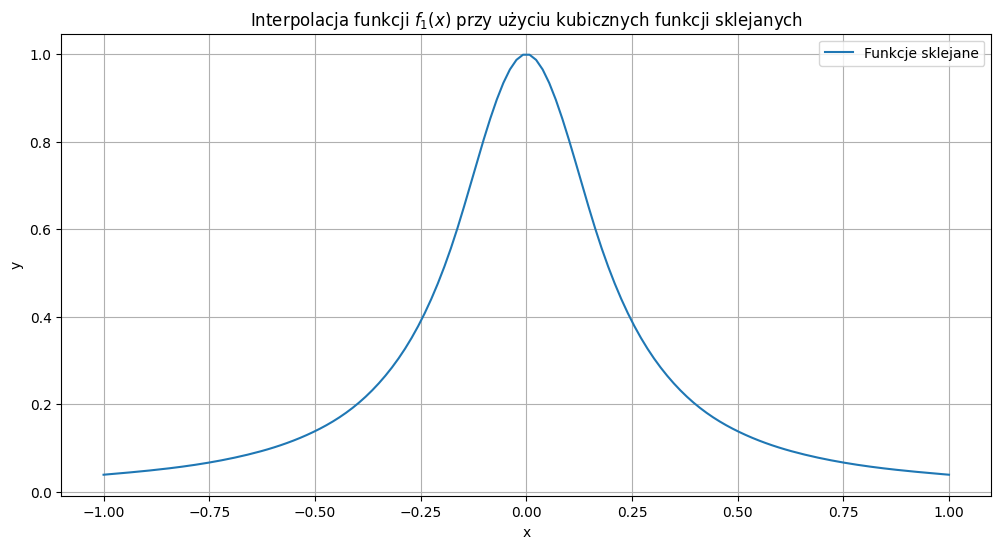

In [6]:
x = np.linspace(-1, 1, n + 1)
y = f1(x)
cs = interp1d(x, y, kind='cubic')
P_cubic = cs(x_dense_uniform)

plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, P_cubic, label='Funkcje sklejane')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$ przy użyciu kubicznych funkcji sklejanych')
plt.legend()
plt.grid(True)
plt.show()

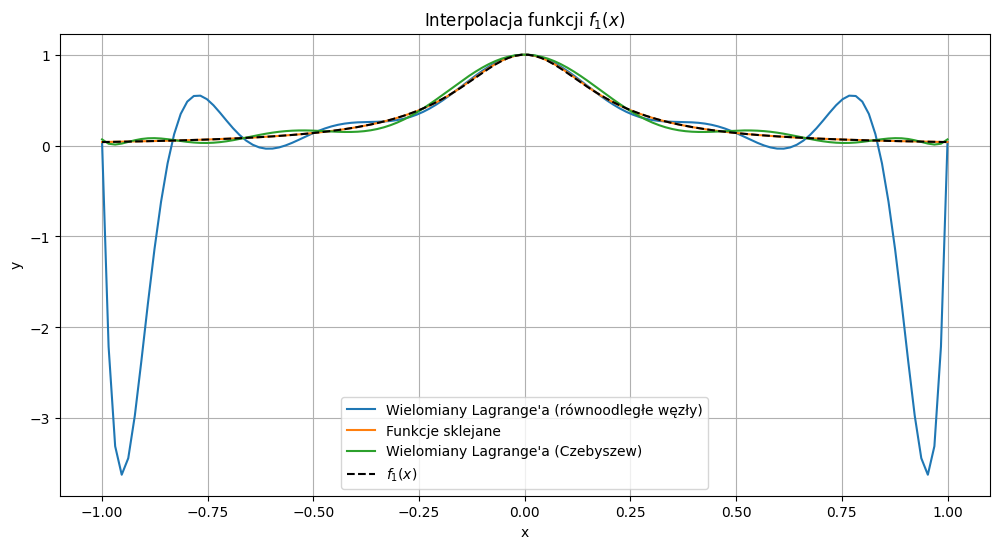

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, P_uniform, label='Wielomiany Lagrange\'a (równoodległe węzły)')
plt.plot(x_dense_uniform, P_cubic, label='Funkcje sklejane')
plt.plot(x_dense_chebyshev, P_chebyshev, label='Wielomiany Lagrange\'a (Czebyszew)')
plt.plot(x_dense_uniform, f1(x_dense_uniform), 'k--', label='$f_1(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$')
plt.legend()
plt.grid(True)
plt.show()